#                                          BIG MART SALES PROBLEM

Problem Statement:

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.
 
Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.


In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
df=pd.read_csv("big mart sales/Train.csv")

In [79]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [80]:
#Item_Type "Health and Hygiene" and "Household" cannot be 
#catogorized according to type of fat content so we assign them to "Others" category.

a=df.loc[df["Item_Type"]=="Household"].index.values
b=df.loc[df["Item_Type"]=="Health and Hygiene"].index.values

c=np.append(a,b)

df["Item_Fat_Content"][c]="Others"

C:\Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [81]:
#Finding the number of unique values of each feature. 

columns=df.columns
for i in columns:
    print(i,": ",len(df[i].unique()))

Item_Identifier :  1559
Item_Weight :  416
Item_Fat_Content :  6
Item_Visibility :  7880
Item_Type :  16
Item_MRP :  5938
Outlet_Identifier :  10
Outlet_Establishment_Year :  9
Outlet_Size :  4
Outlet_Location_Type :  3
Outlet_Type :  4
Item_Outlet_Sales :  3493


In [82]:
#Finding out the number of missing values of each feature

df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

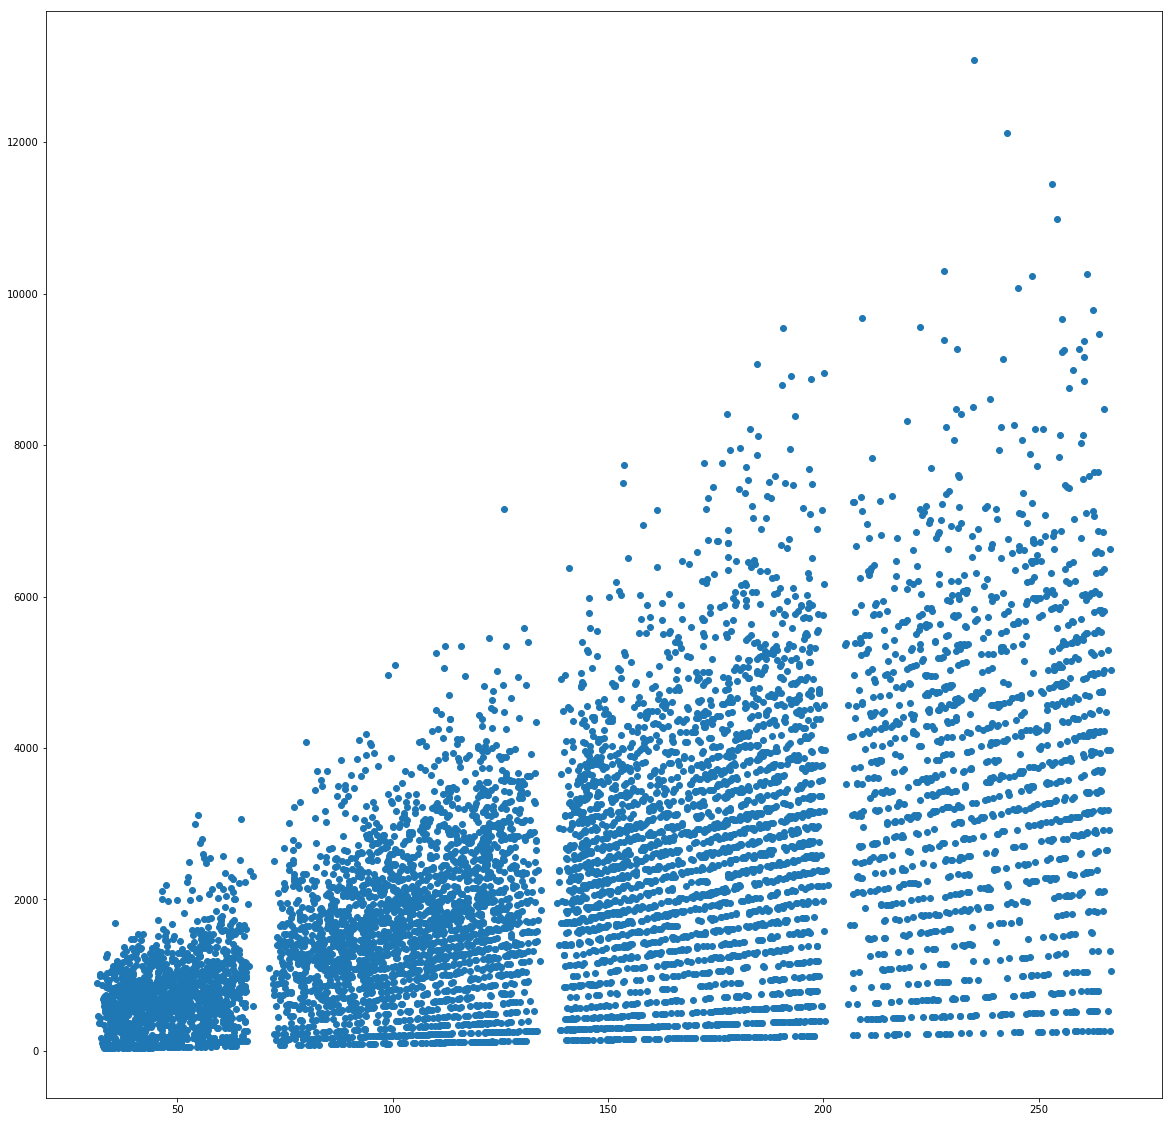

In [83]:
plt.figure(figsize=(20,20))
plt.scatter(x=df["Item_MRP"],y=df["Item_Outlet_Sales"])

In [84]:
#As we can see from the plot there is a linear relationship between
#Item_MRP and Item_Outlet_Sales, so we divide Item_MRP by Item_Outlet_Sales
#to get the sale for particular item.

df["Item_Outlet_Sales"]=round(df.Item_Outlet_Sales/df.Item_MRP)

In [85]:
#To check if there is any relation between Item_Identifier and Item_Weight
#Clearly it can be seen that a unique Item_Identifier has the same value for
#Item_Wieght so we can drop the Item_Weight column to avoid redundancy and also to avoid 
#the extra work of filling the missing values.

df[df.Item_Identifier=="DRG01"]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
544,DRG01,14.8,Low Fat,0.044870,Soft Drinks,76.467,OUT035,2004,Small,Tier 2,Supermarket Type1,20.0
1218,DRG01,14.8,Low Fat,0.044841,Soft Drinks,78.367,OUT013,1987,High,Tier 3,Supermarket Type1,12.0
3005,DRG01,NaN,Low Fat,0.044661,Soft Drinks,74.767,OUT027,1985,Medium,Tier 3,Supermarket Type3,36.0
5974,DRG01,NaN,Low Fat,0.078576,Soft Drinks,78.467,OUT019,1985,Small,Tier 1,Grocery Store,3.0
8522,DRG01,14.8,Low Fat,0.044878,Soft Drinks,75.467,OUT046,1997,Small,Tier 1,Supermarket Type1,10.0


In [86]:
df[df.Item_Identifier=="FDA15" ]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,15.0
831,FDA15,9.3,Low Fat,0.016055,Dairy,250.2092,OUT045,2002,NaN,Tier 2,Supermarket Type1,24.0
2599,FDA15,9.3,Low Fat,0.016019,Dairy,248.5092,OUT035,2004,Small,Tier 2,Supermarket Type1,26.0
2643,FDA15,9.3,Low Fat,0.016088,Dairy,249.6092,OUT018,2009,Medium,Tier 3,Supermarket Type2,24.0
4874,FDA15,9.3,Low Fat,0.026818,Dairy,248.9092,OUT010,1998,NaN,Tier 3,Grocery Store,2.0
5413,FDA15,9.3,Low Fat,0.016009,Dairy,250.6092,OUT013,1987,High,Tier 3,Supermarket Type1,26.0
6696,FDA15,NaN,Low Fat,0.015945,Dairy,249.5092,OUT027,1985,Medium,Tier 3,Supermarket Type3,26.0
7543,FDA15,9.3,LF,0.016113,Dairy,248.8092,OUT017,2007,NaN,Tier 2,Supermarket Type1,24.0


In [88]:
df.Item_Identifier.head(10)

0    FDA15
1    DRC01
2    FDN15
3    FDX07
4    NCD19
5    FDP36
6    FDO10
7    FDP10
8    FDH17
9    FDU28
Name: Item_Identifier, dtype: object

In [12]:
#Converting the Item_Identifier into three different features

def Item_identifier_transform(df):
    a=df[0]+df[1]
    b=df[2]
    c=df[3]+df[4]
    return a,b,c

z=df.Item_Identifier.apply(Item_identifier_transform)

from itertools import chain
k=list(chain.from_iterable(z))

k=np.array(k)
k=k.reshape(-1,3)
df["Item_id_cat1"]=k[:,0]
df["Item_id_cat2"]=k[:,1]
df["Item_id_cat3"]=k[:,2]

print(df.Item_id_cat1[:5],"\n",df.Item_id_cat2[:5],"\n",df.Item_id_cat3[:5])

0    FD
1    DR
2    FD
3    FD
4    NC
Name: Item_id_cat1, dtype: object 
 0    A
1    C
2    N
3    X
4    D
Name: Item_id_cat2, dtype: object 
 0    15
1    01
2    15
3    07
4    19
Name: Item_id_cat3, dtype: object


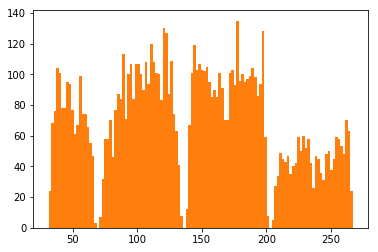

In [13]:
#From the below graph we can see the Item_MRP can be divided into four categories

a=plt.hist(x=df.Item_MRP,bins=120)[1]
b=plt.hist(x=df.Item_MRP,bins=120)[0]

In [14]:
#Converting MRPs into four different categories from what we inferred  
#from the graph above

def mrp(data):
    if data<70:
        data="Low"
    elif data<137:
        data="Medium"
    elif data<202:
        data="High"
    else:
        data="V.High"
    return data    

In [15]:
#Not performed the transformation as it wasn't improvingour model
#df.Item_MRP=df.Item_MRP.apply(mrp)

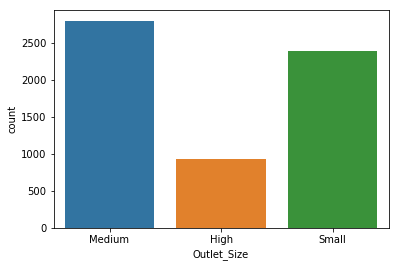

In [16]:
#Checking the count of each Outlet_Size,Outlet_Location_Type and Outlet_Establishment_Year but we can't find any typical characteristics that can help us to 
#boost the predictive ability of our model

sns.countplot(x="Outlet_Size",data=df)

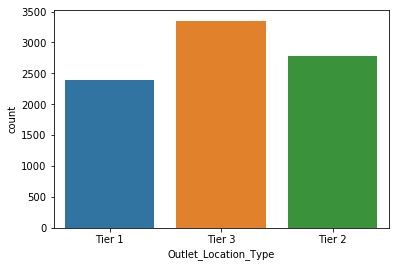

In [17]:
sns.countplot(x="Outlet_Location_Type",data=df)

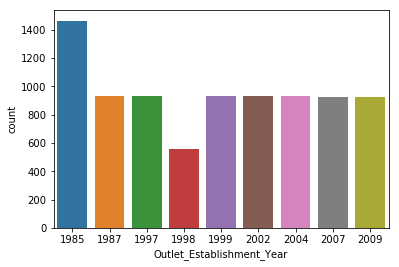

In [18]:
sns.countplot(x="Outlet_Establishment_Year",data=df)

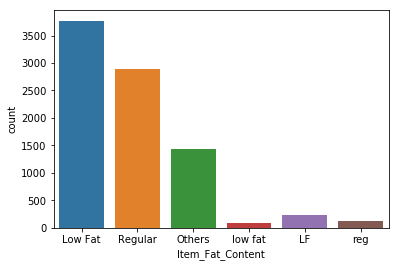

In [19]:
#Clearly other 3 categories namely "LF", "reg", "low fat" can be converted to 2 categories i.e. "Low Fat" and "Regular" 

sns.countplot(x="Item_Fat_Content",data=df)

In [20]:
#Converting the Item_Fat_content into 2 categories

def preprocess(data):
    data.drop("Item_Weight",inplace=True,axis=1)

    data["Item_Fat_Content"].replace(to_replace=["LF","low fat"],value="Low Fat",inplace=True)
    data["Item_Fat_Content"].replace(to_replace=["reg"],value="Regular",inplace=True)
    return data
df=preprocess(df)

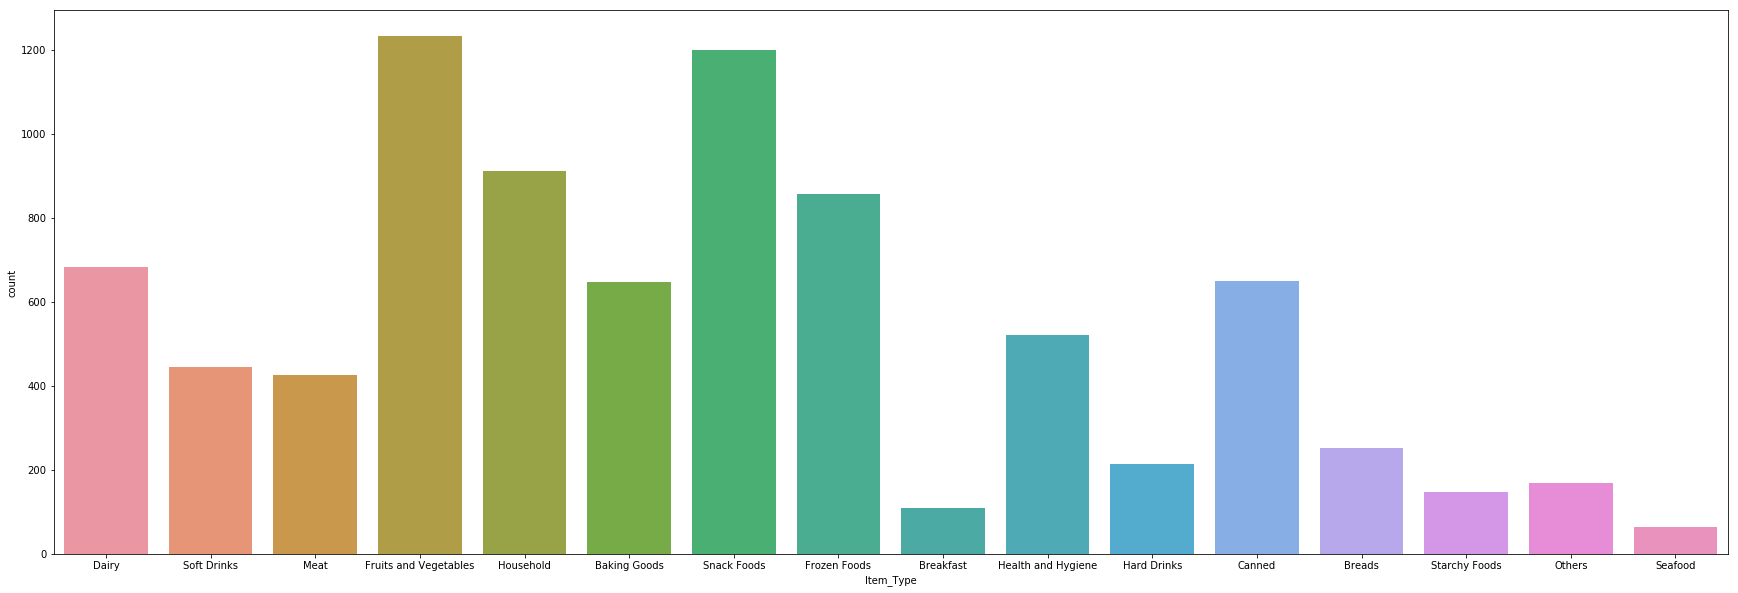

In [21]:
plt.figure(figsize=(30,10))
sns.countplot(x="Item_Type",data=df)

(array([  526.,   410.,  1381.,  1859.,  1720.,  1235.,   910.,   366.,
           71.,    45.]),
 array([ 0.        ,  0.05730541,  0.11461081,  0.17191622,  0.22922162,
         0.28652703,  0.34383243,  0.40113784,  0.45844324,  0.51574865,
         0.57305405]),
 <a list of 10 Patch objects>)

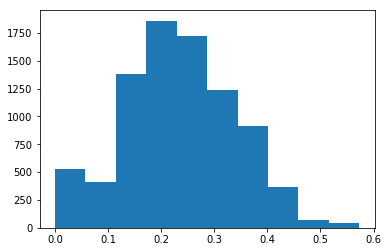

In [22]:
#By taking the square root of Item_Visibilty we get a normal distribution
#suitable for getting better efficiency from our machine leaning model

plt.hist(x=np.sqrt(df["Item_Visibility"]))

In [23]:
#To fill the missing values of Outlet_Type, I have developed a simple Random Forest model to 
#predict the type using the features related to a particular Outlet

def pred_outlet_type(data):
    X_train=data[data.Outlet_Size.notnull()]
    X_test=data[data.Outlet_Size.isnull()]
    Y_train=X_train.pop("Outlet_Size")
    X_test.drop("Outlet_Size",inplace=True,axis=1)

    columns=["Outlet_Identifier","Outlet_Establishment_Year","Outlet_Location_Type","Outlet_Type"]
    X_train=X_train[columns]
    X_test=X_test[columns]

    from sklearn.preprocessing import LabelEncoder
    le=LabelEncoder()
    columns1=["Outlet_Identifier","Outlet_Establishment_Year","Outlet_Location_Type","Outlet_Type"]
    for i in columns1: 
        le.fit(data[i])
        X_train[i]=le.transform(X_train[i])
        X_test[i]=le.transform(X_test[i])

    from sklearn.ensemble import RandomForestClassifier
    from sklearn.grid_search import GridSearchCV

    # model=RandomForestClassifier(random_state=0)
    # parameters={"n_estimators":(50,100,200,120,300,500)}
    # gsearch=GridSearchCV(estimator=model,param_grid=parameters,n_jobs=-1,scoring='accuracy',cv=5)
    # gsearch.fit(X_train,Y_train)
    # gsearch.best_params_
    # gsearch.best_score_

    # model1=RandomForestClassifier(random_state=0,n_estimators=50)
    # parameters={"max_depth":(2,3,4,5,6),"min_samples_leaf":(2,3,4,5,6,7,10),"min_samples_split":(2,5,10,15,20,30,50)}
    # gsearch1=GridSearchCV(estimator=model1,param_grid=parameters,n_jobs=-1,scoring='accuracy',cv=5)
    # gsearch1.fit(X_train,Y_train)
    # gsearch1.best_params_
    # gsearch1.best_score_

    # model2=RandomForestClassifier(random_state=0,n_estimators=50,max_depth=3,min_samples_leaf=2,min_samples_split=2)
    # parameters={"max_features":("log2","sqrt","auto")}
    # gsearch2=GridSearchCV(estimator=model2,param_grid=parameters,n_jobs=-1,scoring='accuracy',cv=5)
    # gsearch2.fit(X_train,Y_train)
    # gsearch2.best_params_
    # gsearch2.best_score_

    final_model=RandomForestClassifier(random_state=0,n_estimators=50,max_depth=3,min_samples_leaf=2,min_samples_split=2,max_features="log2")
    final_model.fit(X_train,Y_train)
    final_model.score(X_train,Y_train)
    predictions=final_model.predict(X_test)

    a=data[data.Outlet_Size.isnull()]
    a.Outlet_Size=predictions
    new_data=data[data.Outlet_Size.notnull()].append(a)
    new_data.reset_index(drop=False,inplace=True)
    return new_data

In [24]:
df=pred_outlet_type(df)
 
df.drop(labels="index",inplace=True,axis=1)
df.drop(labels="Item_Identifier",inplace=True,axis=1)

C:\Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Program Files\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Program Files\Anaconda\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  Deprec

In [25]:
#After filling the missing values

pd.crosstab([df.Outlet_Size],df.Outlet_Location_Type)

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,1487
Medium,930,0,1863
Small,1458,2785,0


In [26]:
#Encoding data into suitable numerical form as we use categorical values

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
columns1=["Outlet_Identifier","Outlet_Location_Type","Outlet_Type","Item_Fat_Content","Item_Type","Outlet_Size","Item_MRP","Item_id_cat1","Item_id_cat2","Item_id_cat3"]
for i in columns1:
    df[i]=le.fit_transform(df[i])    
y=df.pop("Item_Outlet_Sales")
X=df

In [27]:
df.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_id_cat1,Item_id_cat2,Item_id_cat3
0,0,0.016047,4,5592,9,1999,1,0,1,1,0,14
1,2,0.019278,14,473,3,2009,1,2,2,0,2,0
2,0,0.016760,10,2901,9,1999,1,0,1,1,13,14
3,1,0.000000,9,627,1,1987,0,2,1,2,3,18
4,2,0.000000,0,563,3,2009,1,2,2,1,15,35


In [28]:
#Performing test and train split of the data

from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [29]:
#Normalizing data as it is suitable for regression models to learn from normalized data

from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler().fit(X_train)
X_train=scale.transform(X_train)
X_test=scale.transform(X_test)

Linear Regression Model Using Polynomial Features 

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=2)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)
lin=LinearRegression()
lin.fit(X_train_poly,y_train)
predict=lin.predict(X_test_poly)
np.sqrt(mean_squared_error(y_test,predict))

7.2038492646810184

Ridge Regression Model

In [31]:
from sklearn.linear_model import Ridge

ridge1=Ridge(random_state=0)
ridge1.fit(X_train,y_train)
predict=ridge1.predict(X_test)
np.sqrt(mean_squared_error(y_test,predict))

7.7838799734978528

Ridge Regression Using Polynomial Features

In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

poly=PolynomialFeatures(degree=3)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)
ridge=Ridge(random_state=0,alpha=1)
ridge.fit(X_train_poly,y_train)
predict=ridge.predict(X_test_poly)
np.sqrt(mean_squared_error(y_test,predict))

7.2284483612427648

K-Neighbours Regressor

In [33]:
from sklearn.neighbors import KNeighborsRegressor

neigh=KNeighborsRegressor(n_neighbors=7)
neigh.fit(X_train,y_train)
predict=neigh.predict(X_test)
np.sqrt(mean_squared_error(y_test,predict))

7.6528975743619112

Lasso Regression

In [34]:
from sklearn.linear_model import Lasso

lasso=Lasso(random_state=0)
lasso.fit(X_train,y_train)
predict=lasso.predict(X_test)
np.sqrt(mean_squared_error(y_test,predict))

8.8422926280717551

Gradient Boosting Regressor

In [35]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.grid_search import GridSearchCV
gbm=GradientBoostingRegressor(max_features='sqrt',random_state=0)
gbm.fit(X_train,y_train)
predict=gbm.predict(X_test)
np.sqrt(mean_squared_error(y_test,predict))

7.1696980784404047

Parameter Tuning of Gradient Boosting Regressor

In [36]:
from sklearn.pipeline import Pipeline

In [37]:
pipeline1=Pipeline([("clf",GradientBoostingRegressor(learning_rate=0.1, min_samples_split=10,min_samples_leaf=2,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10))])

parameters1={"clf__n_estimators":(20,30,40,50,60,70,80,100,120,150,200,300)}

gsearch1=GridSearchCV(pipeline1,parameters1,scoring='neg_mean_squared_error',n_jobs=-1,cv=10)

gsearch1.fit(X_train,y_train)

print(gsearch1.best_params_)

print(gsearch1.best_score_)

{'clf__n_estimators': 30}
-48.43310683304826


In [38]:
pipeline2=Pipeline([("clf",GradientBoostingRegressor(learning_rate=0.1,n_estimators=30,max_features='sqrt',subsample=0.8,random_state=10))])

In [39]:
parameters2={'clf__max_depth':(2,3,4,5,6,7,8,9),"clf__min_samples_split":(5,10,15,20,30,40,50),"clf__min_samples_leaf":(2,4,6,8,10,12)}

In [40]:
gsearch2=GridSearchCV(pipeline2,parameters2,scoring='neg_mean_squared_error',n_jobs=-1,cv=10)

In [41]:
gsearch2.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('clf', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None...ors=30, presort='auto',
             random_state=10, subsample=0.8, verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'clf__max_depth': (2, 3, 4, 5, 6, 7, 8, 9), 'clf__min_samples_split': (5, 10, 15, 20, 30, 40, 50), 'clf__min_samples_leaf': (2, 4, 6, 8, 10, 12)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_squared_error', verbose=0)

In [42]:
gsearch2.best_params_

{'clf__max_depth': 5,
 'clf__min_samples_leaf': 10,
 'clf__min_samples_split': 40}

In [43]:
gsearch2.best_score_

-47.2176860877326

In [44]:
pipeline3=Pipeline([("clf",GradientBoostingRegressor(learning_rate=0.1,n_estimators=30,max_depth=6,min_samples_leaf=10,min_samples_split=5,subsample=.8,random_state=10))])

parameters3={"clf__max_features":("sqrt","log2","auto")}

gsearch3=GridSearchCV(pipeline3,parameters3,scoring='neg_mean_squared_error',n_jobs=-1,cv=10)

gsearch3.fit(X_train,y_train)

print(gsearch3.best_params_)

print(gsearch3.best_score_)

{'clf__max_features': 'sqrt'}
-47.63696127337629


In [45]:
gbm1=GradientBoostingRegressor(n_estimators=30,learning_rate=0.1,max_depth=6,max_features='sqrt',min_samples_leaf=10,min_samples_split=5,random_state=10,subsample=.8)
gbm1.fit(X_train,y_train)
predict=gbm1.predict(X_test)
np.sqrt(mean_squared_error(y_test,predict))

7.162871068582584

In [46]:
gbm2=GradientBoostingRegressor(n_estimators=60,learning_rate=0.05,max_depth=6,max_features='sqrt',min_samples_leaf=10,min_samples_split=5,random_state=10,subsample=.8)
gbm2.fit(X_train,y_train)
predict=gbm2.predict(X_test)
np.sqrt(mean_squared_error(y_test,predict))

7.1649073277951638

In [47]:
gbm3=GradientBoostingRegressor(n_estimators=120,learning_rate=0.01,max_depth=6,max_features='sqrt',min_samples_leaf=10,min_samples_split=5,random_state=10,subsample=.8)
gbm3.fit(X_train,y_train)
predict=gbm3.predict(X_test)
np.sqrt(mean_squared_error(y_test,predict))

7.3998896412439663

In [48]:
gbm4=GradientBoostingRegressor(n_estimators=240,learning_rate=0.01,max_depth=6,max_features='sqrt',min_samples_leaf=10,min_samples_split=5,random_state=10,subsample=.8)
gbm4.fit(X_train,y_train)
predict=gbm4.predict(X_test)
np.sqrt(mean_squared_error(y_test,predict))

7.1865101704629124

In [49]:
gbm5=GradientBoostingRegressor(n_estimators=480,learning_rate=0.005,max_depth=6,max_features='sqrt',min_samples_leaf=10,min_samples_split=5,random_state=10,subsample=.8)
gbm5.fit(X_train,y_train)
predict=gbm5.predict(X_test)
np.sqrt(mean_squared_error(y_test,predict))

7.1768634568039156

XGBoost Classifier with Parameter Tuning

In [50]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

In [51]:
xgb1=XGBRegressor(learning_rate=0.1,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,nthread=4,scale_pos_weight=1,seed=27)

pipeline1=Pipeline([("clf",XGBRegressor(learning_rate=0.1,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,nthread=4,scale_pos_weight=1,seed=27))])

parameters1={"clf__n_estimators":(20,30,40,50,60,70,80,100,120,150,200,300)}

xgsearch1=GridSearchCV(pipeline1,parameters1,scoring='neg_mean_squared_error',n_jobs=-1,cv=10)

xgsearch1.fit(X_train,y_train)

print(xgsearch1.best_params_)

print(xgsearch1.best_score_)

{'clf__n_estimators': 40}
-47.60782250651585


In [52]:
param_test1 = {
 'max_depth':(3,5,7,9,10),
 'min_child_weight':(1,3,5,6)
}
xgsearch2 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, n_estimators=40,gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=10)
xgsearch2.fit(X_train,y_train)
xgsearch2.grid_scores_, xgsearch2.best_params_, xgsearch2.best_score_

([mean: -47.19933, std: 2.31680, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: -47.18257, std: 2.33772, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: -47.19529, std: 2.34561, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: -47.19533, std: 2.34741, params: {'max_depth': 3, 'min_child_weight': 6},
  mean: -47.60769, std: 2.35489, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: -47.63528, std: 2.42772, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: -47.54608, std: 2.36733, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: -47.65641, std: 2.41582, params: {'max_depth': 5, 'min_child_weight': 6},
  mean: -48.26091, std: 2.41531, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: -48.33168, std: 2.29197, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: -48.68947, std: 2.24452, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: -48.66744, std: 2.38916, params: {'max_depth': 7, 'min_child_weight': 6},
  mean: -49.9729

In [53]:
param_test2 = {
 'max_depth':(2,3,4),
 'min_child_weight':(2,3,4)
}
xgsearch2 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, n_estimators=40, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test2, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=10)
xgsearch2.fit(X_train,y_train)
xgsearch2.grid_scores_, xgsearch2.best_params_, xgsearch2.best_score_

([mean: -47.31612, std: 2.34917, params: {'max_depth': 2, 'min_child_weight': 2},
  mean: -47.31522, std: 2.34977, params: {'max_depth': 2, 'min_child_weight': 3},
  mean: -47.31522, std: 2.34977, params: {'max_depth': 2, 'min_child_weight': 4},
  mean: -47.19204, std: 2.32864, params: {'max_depth': 3, 'min_child_weight': 2},
  mean: -47.18257, std: 2.33772, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: -47.18972, std: 2.34101, params: {'max_depth': 3, 'min_child_weight': 4},
  mean: -47.23512, std: 2.34724, params: {'max_depth': 4, 'min_child_weight': 2},
  mean: -47.25259, std: 2.40554, params: {'max_depth': 4, 'min_child_weight': 3},
  mean: -47.25653, std: 2.36605, params: {'max_depth': 4, 'min_child_weight': 4}],
 {'max_depth': 3, 'min_child_weight': 3},
 -47.18257410480236)

In [54]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
xgsearch3 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, n_estimators=40, max_depth=3,
 min_child_weight=3, subsample=0.8, colsample_bytree=0.8, nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=5)
xgsearch3.fit(X_train,y_train)
xgsearch3.grid_scores_, xgsearch3.best_params_, xgsearch3.best_score_

([mean: -47.11471, std: 1.51389, params: {'gamma': 0.0},
  mean: -47.11471, std: 1.51389, params: {'gamma': 0.1},
  mean: -47.11471, std: 1.51389, params: {'gamma': 0.2},
  mean: -47.11460, std: 1.51394, params: {'gamma': 0.3},
  mean: -47.11462, std: 1.51391, params: {'gamma': 0.4}],
 {'gamma': 0.3},
 -47.11459868755689)

In [55]:
pipeline1=Pipeline([("clf",XGBRegressor(learning_rate=0.1,max_depth=3,min_child_weight=3,gamma=0.3,subsample=0.8,colsample_bytree=0.8,nthread=4,scale_pos_weight=1,seed=27))])

parameters1={"clf__n_estimators":(20,30,40,50,60,70,80,100,120,150,200,300)}

xgsearch4=GridSearchCV(pipeline1,parameters1,scoring='neg_mean_squared_error',n_jobs=-1,cv=10)

xgsearch4.fit(X_train,y_train)

print(xgsearch4.best_params_)

print(xgsearch4.best_score_)

{'clf__n_estimators': 70}
-47.0429772643545


In [56]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
xgsearch4 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, n_estimators=70, max_depth=3,
 min_child_weight=3, nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=5)
xgsearch4.fit(X_train,y_train)
xgsearch4.grid_scores_, xgsearch4.best_params_, xgsearch4.best_score_

([mean: -46.94788, std: 1.49860, params: {'colsample_bytree': 0.6, 'subsample': 0.6},
  mean: -47.13301, std: 1.53324, params: {'colsample_bytree': 0.6, 'subsample': 0.7},
  mean: -47.00514, std: 1.44992, params: {'colsample_bytree': 0.6, 'subsample': 0.8},
  mean: -46.99622, std: 1.48131, params: {'colsample_bytree': 0.6, 'subsample': 0.9},
  mean: -47.02807, std: 1.43863, params: {'colsample_bytree': 0.7, 'subsample': 0.6},
  mean: -47.06507, std: 1.44717, params: {'colsample_bytree': 0.7, 'subsample': 0.7},
  mean: -46.90067, std: 1.43328, params: {'colsample_bytree': 0.7, 'subsample': 0.8},
  mean: -46.99451, std: 1.42762, params: {'colsample_bytree': 0.7, 'subsample': 0.9},
  mean: -47.12871, std: 1.49163, params: {'colsample_bytree': 0.8, 'subsample': 0.6},
  mean: -46.97919, std: 1.53798, params: {'colsample_bytree': 0.8, 'subsample': 0.7},
  mean: -46.90471, std: 1.52072, params: {'colsample_bytree': 0.8, 'subsample': 0.8},
  mean: -46.99004, std: 1.50566, params: {'colsample_b

In [57]:
param_test5 = {
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(65,80,5)]
}
xgsearch5 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, n_estimators=70, max_depth=3,
 min_child_weight=3, nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=5)
xgsearch5.fit(X_train,y_train)
xgsearch5.grid_scores_, xgsearch5.best_params_, xgsearch5.best_score_

([mean: -46.98702, std: 1.55802, params: {'colsample_bytree': 0.65, 'subsample': 0.75},
  mean: -47.00514, std: 1.44992, params: {'colsample_bytree': 0.65, 'subsample': 0.8},
  mean: -47.02859, std: 1.50856, params: {'colsample_bytree': 0.65, 'subsample': 0.85},
  mean: -47.16799, std: 1.54645, params: {'colsample_bytree': 0.7, 'subsample': 0.75},
  mean: -46.90067, std: 1.43328, params: {'colsample_bytree': 0.7, 'subsample': 0.8},
  mean: -47.02561, std: 1.53256, params: {'colsample_bytree': 0.7, 'subsample': 0.85},
  mean: -47.04028, std: 1.53826, params: {'colsample_bytree': 0.75, 'subsample': 0.75},
  mean: -46.90471, std: 1.52072, params: {'colsample_bytree': 0.75, 'subsample': 0.8},
  mean: -46.97441, std: 1.61164, params: {'colsample_bytree': 0.75, 'subsample': 0.85}],
 {'colsample_bytree': 0.7, 'subsample': 0.8},
 -46.900667215327424)

In [58]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
xgsearch6 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, n_estimators=70, max_depth=3,
 min_child_weight=3, nthread=4, scale_pos_weight=1,seed=27,colsample_bytree=.7,subsample=.8), 
 param_grid = param_test6, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=5)
xgsearch6.fit(X_train,y_train)
xgsearch6.grid_scores_, xgsearch6.best_params_, xgsearch6.best_score_

([mean: -46.90067, std: 1.43328, params: {'reg_alpha': 1e-05},
  mean: -46.90063, std: 1.43327, params: {'reg_alpha': 0.01},
  mean: -46.88382, std: 1.43150, params: {'reg_alpha': 0.1},
  mean: -46.90497, std: 1.50743, params: {'reg_alpha': 1},
  mean: -46.82617, std: 1.45608, params: {'reg_alpha': 100}],
 {'reg_alpha': 100},
 -46.82616893764634)

In [59]:
param_test7 = {
 'reg_alpha':[ 1,10,50,90,95,110,105,120 ,100]
}
xgsearch7 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, n_estimators=70, max_depth=3,
 min_child_weight=3, nthread=4, scale_pos_weight=1,seed=27,colsample_bytree=.7,subsample=.8), 
 param_grid = param_test7, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=5)
xgsearch7.fit(X_train,y_train)
xgsearch7.grid_scores_, xgsearch7.best_params_, xgsearch7.best_score_

([mean: -46.90497, std: 1.50743, params: {'reg_alpha': 1},
  mean: -46.89858, std: 1.43766, params: {'reg_alpha': 10},
  mean: -46.82191, std: 1.45354, params: {'reg_alpha': 50},
  mean: -46.82183, std: 1.41867, params: {'reg_alpha': 90},
  mean: -46.80674, std: 1.42855, params: {'reg_alpha': 95},
  mean: -46.84510, std: 1.41479, params: {'reg_alpha': 110},
  mean: -46.84527, std: 1.44144, params: {'reg_alpha': 105},
  mean: -46.86947, std: 1.42345, params: {'reg_alpha': 120},
  mean: -46.82617, std: 1.45608, params: {'reg_alpha': 100}],
 {'reg_alpha': 95},
 -46.80674003621046)

In [60]:
param_test8={"n_estimators":(20,30,40,50,60,70,80,100,120,150,200,300)}
xgsearch8 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, max_depth=3,
 min_child_weight=3, nthread=4, scale_pos_weight=1,seed=27,colsample_bytree=.7,subsample=.8,reg_alpha=95), 
 param_grid = param_test8, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=5)
xgsearch8.fit(X_train,y_train)
xgsearch8.grid_scores_, xgsearch8.best_params_, xgsearch8.best_score_

([mean: -51.59966, std: 1.32627, params: {'n_estimators': 20},
  mean: -47.87431, std: 1.25822, params: {'n_estimators': 30},
  mean: -47.20588, std: 1.32163, params: {'n_estimators': 40},
  mean: -46.94830, std: 1.38727, params: {'n_estimators': 50},
  mean: -46.84354, std: 1.44215, params: {'n_estimators': 60},
  mean: -46.80674, std: 1.42855, params: {'n_estimators': 70},
  mean: -46.81277, std: 1.48575, params: {'n_estimators': 80},
  mean: -46.85188, std: 1.50282, params: {'n_estimators': 100},
  mean: -46.91012, std: 1.50481, params: {'n_estimators': 120},
  mean: -46.97872, std: 1.61936, params: {'n_estimators': 150},
  mean: -47.18825, std: 1.65468, params: {'n_estimators': 200},
  mean: -47.49869, std: 1.66188, params: {'n_estimators': 300}],
 {'n_estimators': 70},
 -46.80674003621046)

In [61]:
xgb3=XGBRegressor( learning_rate =0.1, max_depth=3,n_estimators=70,min_child_weight=3,nthread=4, scale_pos_weight=1,seed=27,colsample_bytree=.7,subsample=.8,reg_alpha=95)
xgb3.fit(X_train,y_train)
y_pred=xgb3.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

7.1523249710389853

In [62]:
xgb4=XGBRegressor( learning_rate =0.05, max_depth=3,n_estimators=140,min_child_weight=3, nthread=4, scale_pos_weight=1,seed=27,colsample_bytree=.7,subsample=.8,reg_alpha=95) 
xgb4.fit(X_train,y_train)
y_pred=xgb4.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

7.1500154968332597

In [63]:
xgb5=XGBRegressor( learning_rate =0.01, max_depth=3,n_estimators=280,min_child_weight=3, nthread=4, scale_pos_weight=1,seed=27,colsample_bytree=.7,subsample=.8,reg_alpha=95) 
xgb5.fit(X_train,y_train)
y_pred=xgb5.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

7.2690561684934938

In [64]:
xgb6=XGBRegressor( learning_rate =0.005, max_depth=3,n_estimators=560,min_child_weight=3, nthread=4, scale_pos_weight=1,seed=27,colsample_bytree=.7,subsample=.8,reg_alpha=95) 
xgb6.fit(X_train,y_train)
y_pred=xgb6.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

7.2727261172639466

In [89]:
test=pd.read_csv("big mart sales/Test.csv")

In [90]:
test_MRP=test.Item_MRP

In [91]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [68]:
z=test.Item_Identifier.apply(Item_identifier_transform)

from itertools import chain
k=list(chain.from_iterable(z))

k=np.array(k)
k=k.reshape(-1,3)
test["Item_id_cat1"]=k[:,0]
test["Item_id_cat2"]=k[:,1]
test["Item_id_cat3"]=k[:,2]

test=preprocess(test)

#test.Item_MRP=test.Item_MRP.apply(mrp)

test=pred_outlet_type(test)

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
columns1=["Outlet_Identifier","Outlet_Location_Type","Outlet_Type","Item_Fat_Content","Item_Type","Outlet_Size","Item_id_cat1","Item_id_cat2","Item_id_cat3"]
for i in columns1:
    test[i]=le.fit_transform(test[i])

test=test.sort_values(by="index")
test.drop(labels="index",inplace=True,axis=1)
test.drop(labels="Item_Identifier",inplace=True,axis=1)

test1=test
from sklearn.preprocessing import MinMaxScaler
scale1=MinMaxScaler().fit(test1)
test1=scale1.transform(test1)

C:\Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Program Files\Anaconda\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [73]:
predict=gbm2.predict(test1) #model with least RMSE

In [70]:
final_predict=predict*test_MRP  #Multiplying the MRP to get final Outlet Sales

submission=pd.read_csv("big mart sales/SampleSubmission.csv")

submission.Item_Outlet_Sales=final_predict


In [71]:
submission.to_csv("big mart sales/Submission1.csv", sep=",",index=None)

In [92]:
final_predict.head()

0    1790.593396
1    1416.721513
2     663.471936
3    2553.367094
4    6224.151246
Name: Item_MRP, dtype: float64